Here we make Predictions using Machine Learning algorithms.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
dataset = pd.read_csv('C:\\Users\\Mahes\\Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [6]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
dataset["Age"].value_counts()

35    32
37    20
41    16
42    16
26    16
39    15
40    15
47    14
48    14
38    13
27    13
28    12
46    12
36    12
31    11
30    11
29    10
49    10
32     9
33     9
24     9
20     7
19     7
60     7
59     7
45     7
25     6
34     6
58     6
52     6
23     6
57     5
22     5
18     5
53     5
21     4
50     4
54     4
55     3
43     3
56     3
51     3
44     2
Name: Age, dtype: int64

In [8]:
dataset["EstimatedSalary"].value_counts()

72000     12
80000     11
79000     10
71000      9
75000      9
          ..
142000     1
100000     1
37000      1
114000     1
64000      1
Name: EstimatedSalary, Length: 117, dtype: int64

In [9]:
dataset["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

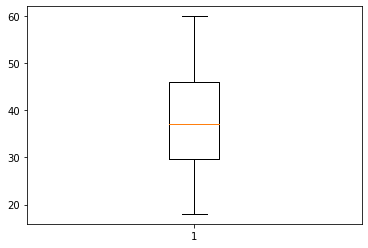

In [10]:
q = list(dataset.Age) 
plt.boxplot(q) 
plt.show()

In [11]:
dataset.groupby(['Age', 'Purchased']).mean()

,,User ID,EstimatedSalary
Age,Purchased,,
18,0,1.567696e+07,66400.000000
19,0,1.571065e+07,46000.000000
20,0,1.569884e+07,61714.285714
21,0,1.565027e+07,61000.000000
22,0,1.568825e+07,48800.000000
...,...,...,...
57,1,1.576347e+07,63000.000000
58,1,1.565926e+07,74666.666667
59,0,1.565630e+07,62500.000000


In [12]:
dataset.groupby(['Age', 'Purchased']).std()

,,User ID,EstimatedSalary
Age,Purchased,,
18,0,78336.190687,18297.540818
19,0,73765.300119,29416.548631
20,0,57402.936205,25447.424793
21,0,104799.217486,31219.651931
22,0,82558.169564,25984.610830
...,...,...,...
57,1,52274.273740,38340.579025
58,1,76607.985168,46245.720523
59,0,72546.327323,28991.378029


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [14]:
dataset.head(25)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


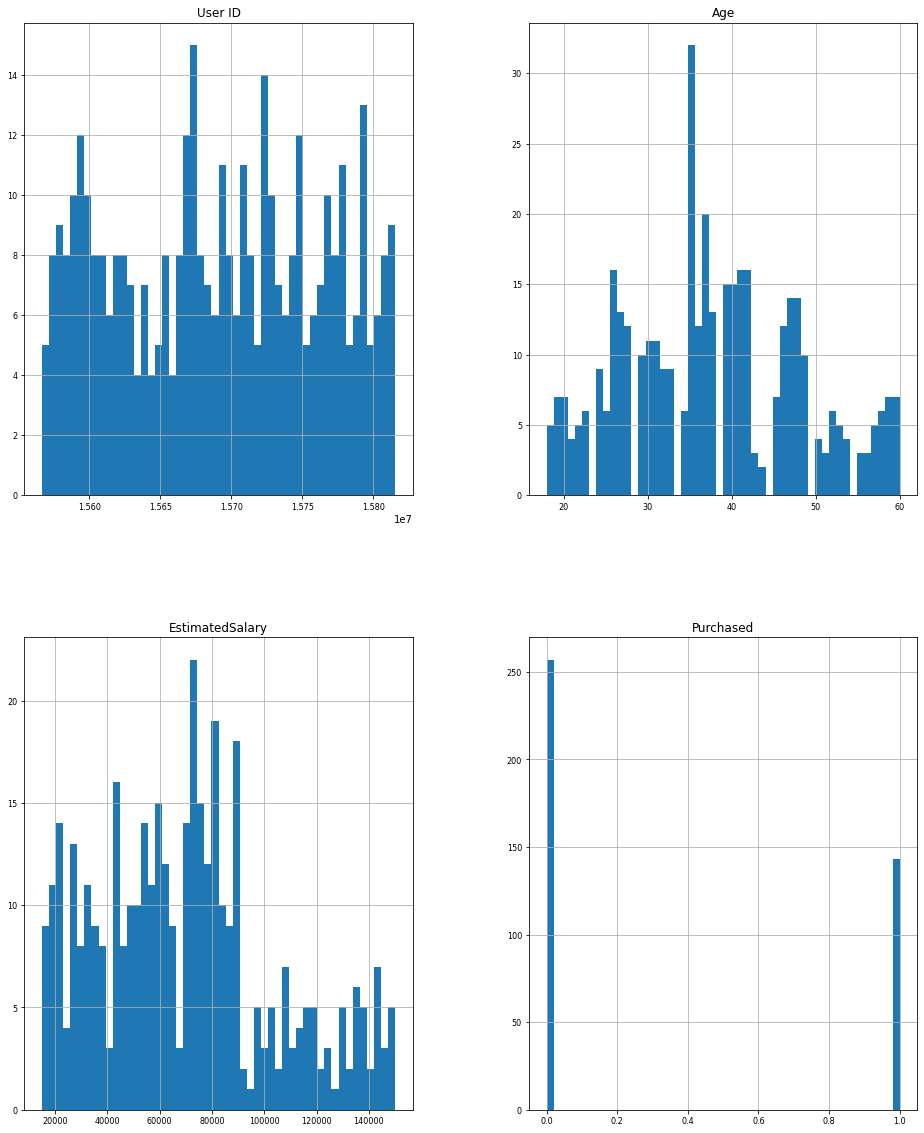

In [15]:
dataset.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

# Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [18]:
# fitting logistic regresion to the training set
from sklearn.linear_model import LogisticRegression
classi = LogisticRegression(random_state = 0)
classi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
#predict the test set results
y_pred = classi.predict(X_test)

In [20]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [21]:
print(cm)    #confusion Matrix

[[65  3]
 [ 8 24]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


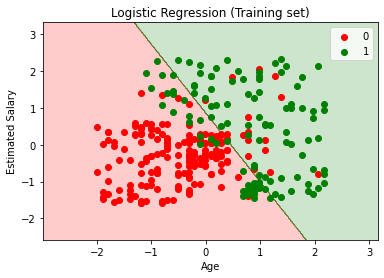

In [23]:
#visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred = classi.predict(X1X2_array_t)
X1X2_pred_reshape = X1X2_pred.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape, alpha= 0.20, 
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


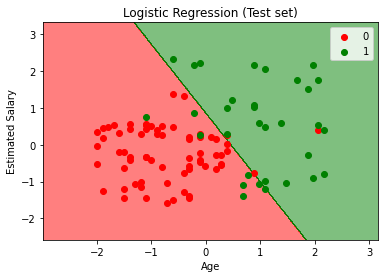

In [24]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred = classi.predict(X1X2_array_t)
X1X2_pred_reshape = X1X2_pred.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape, alpha= 0.50, 
                           cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [25]:
# Use score method to get accuracy of model
score = classi.score(X_test, y_test)
print("Accuracy using Logistic Regression: ",score)

Accuracy using Logistic Regression:  0.89


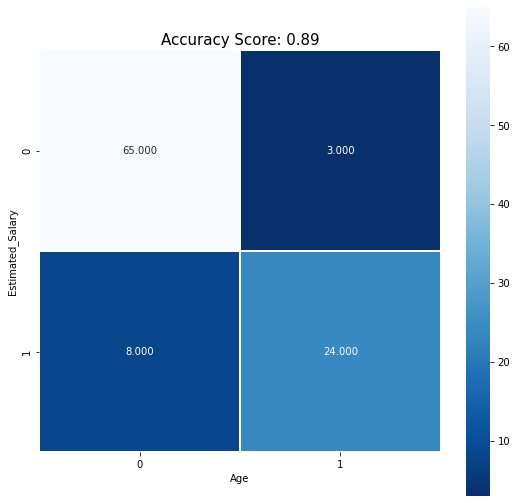

In [26]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Estimated_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [27]:
# fitting classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classi1 = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'minkowski')
classi1.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
#predict the test set results
y_pred1 = classi1.predict(X_test)

In [29]:
print(y_pred1)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


In [30]:
# Use score method to get accuracy of model
score = classi1.score(X_test, y_test)
print("Accuracy using KNN: ",score)

Accuracy using KNN:  0.93


In [31]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[64  4]
 [ 3 29]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


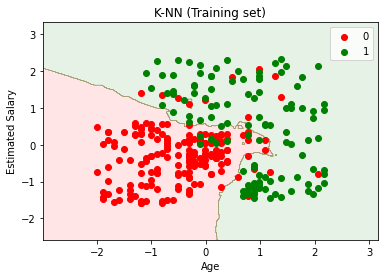

In [32]:
#visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred = classi1.predict(X1X2_array_t)
X1X2_pred_reshape = X1X2_pred.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape, alpha= 0.10, 
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


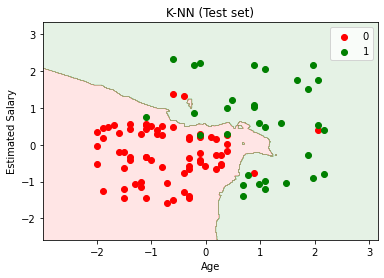

In [33]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred = classi1.predict(X1X2_array_t)
X1X2_pred_reshape = X1X2_pred.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape, alpha= 0.10, 
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

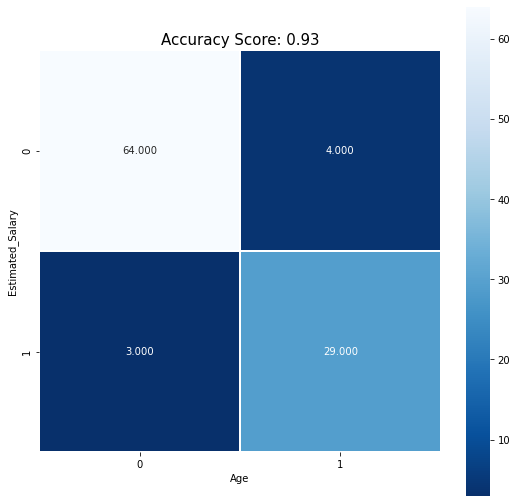

In [34]:
#heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Estimated_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [35]:
# fitting classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classi2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classi2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
#predict the test set results
y_pred2 = classi2.predict(X_test)

In [37]:
print(y_pred2)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [38]:
# Use score method to get accuracy of model
score = classi2.score(X_test, y_test)
print("Accuracy using Decision tree: ",score)

Accuracy using Decision tree:  0.91


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


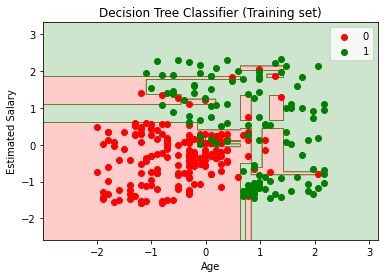

In [39]:
#visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred1 = classi2.predict(X1X2_array_t)
X1X2_pred_reshape1 = X1X2_pred1.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape1, alpha= 0.20, 
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


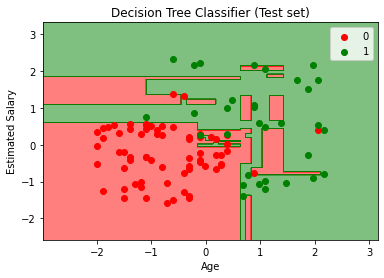

In [40]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred1 = classi2.predict(X1X2_array_t)
X1X2_pred_reshape1 = X1X2_pred1.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape1, alpha= 0.50, 
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [41]:
cm2 = confusion_matrix(y_test, y_pred2)

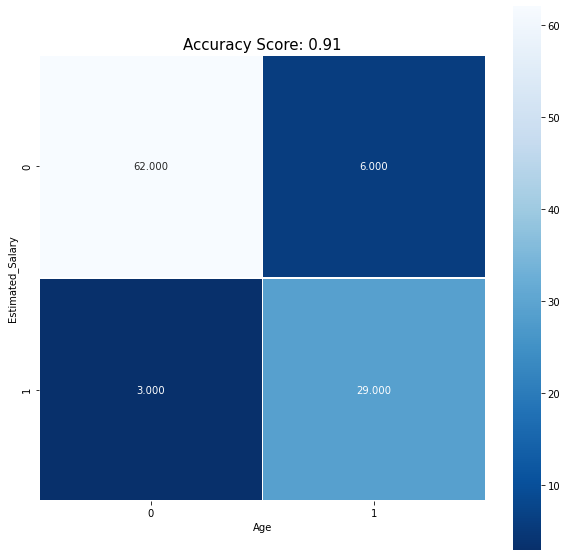

In [42]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Estimated_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [43]:
# fitting random forest classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classi3 = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 0)
classi3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [44]:
#predict the test set results
y_pred3 = classi3.predict(X_test)

In [45]:
# Use score method to get accuracy of model
score = classi3.score(X_test, y_test)

In [46]:
print("Accuracy using Random Forest: ",score)

Accuracy using Random Forest:  0.91


In [47]:
cm3 = confusion_matrix(y_test, y_pred3)

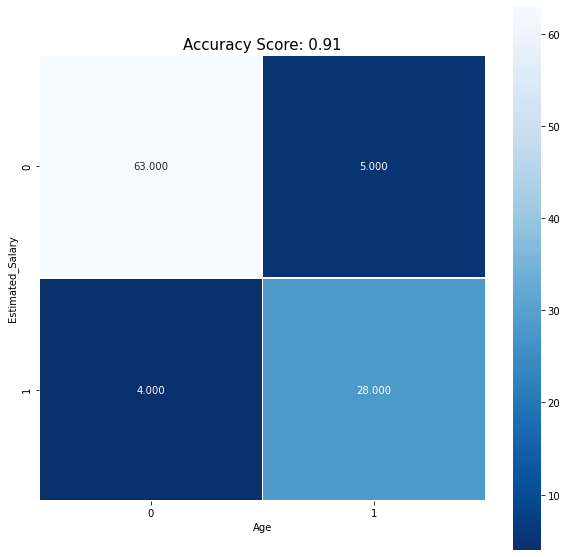

In [48]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Estimated_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


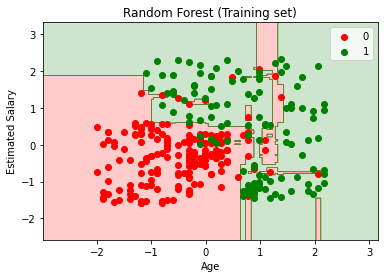

In [49]:
#visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred2 = classi3.predict(X1X2_array_t)
X1X2_pred_reshape2 = X1X2_pred2.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape2, alpha= 0.20, 
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


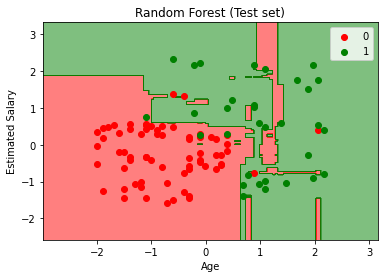

In [50]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred2 = classi3.predict(X1X2_array_t)
X1X2_pred_reshape2 = X1X2_pred2.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape2, alpha= 0.50, 
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [51]:
# fitting SVM to the training set
from sklearn.svm import SVC
classi4 = SVC(kernel='rbf', random_state = 0)
classi4.fit(X_train, y_train)

SVC(random_state=0)

In [52]:
#predict the test set results
y_pred4 = classi4.predict(X_test)

In [53]:
print(y_pred4)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


In [54]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4)

In [55]:
print(cm4)

[[64  4]
 [ 3 29]]


In [56]:
# Use score method to get accuracy of model
scoreee = classi4.score(X_test, y_test)
print("Accuracy using SVM : ",scoreee)

Accuracy using SVM :  0.93


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


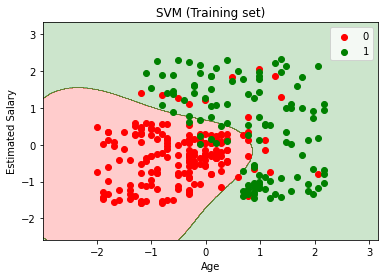

In [57]:
#visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred3 = classi4.predict(X1X2_array_t)
X1X2_pred_reshape3 = X1X2_pred3.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape3, alpha= 0.20, 
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [58]:
    #visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred3 = classi4.predict(X1X2_array_t)
X1X2_pred_reshape3 = X1X2_pred3.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape3, alpha= 0.50, 
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

IndentationError: expected an indented block (<ipython-input-58-38818906fe81>, line 15)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


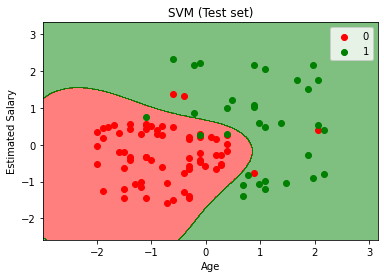

In [59]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred3 = classi4.predict(X1X2_array_t)
X1X2_pred_reshape3 = X1X2_pred3.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape3, alpha= 0.50, 
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [60]:
#naive bays

In [61]:
# fitting Naive Bayes to the training set
from sklearn.naive_bayes import GaussianNB
classi6 = GaussianNB()
classi6.fit(X_train, y_train)

GaussianNB()

In [62]:
#predict the test set results
y_pred6 = classi6.predict(X_test)

In [63]:
cm6 = confusion_matrix(y_test, y_pred6)

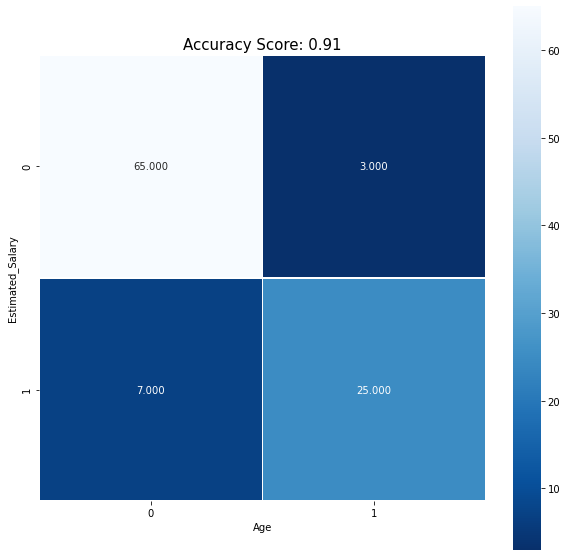

In [64]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Estimated_Salary');
plt.xlabel('Age');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


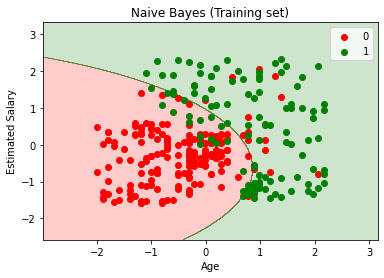

In [65]:
#visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred6 = classi6.predict(X1X2_array_t)
X1X2_pred_reshape6 = X1X2_pred6.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape6, alpha= 0.20, 
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


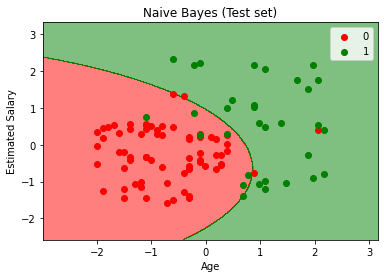

In [66]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
X1_ravel = X1.ravel()
X2_ravel = X2.ravel()
X1X2_array = np.array([X1_ravel, X2_ravel])
X1X2_array_t = X1X2_array.T
X1X2_pred6 = classi6.predict(X1X2_array_t)
X1X2_pred_reshape6 = X1X2_pred6.reshape(X1.shape)
result_plt = plt.contourf(X1, X2, X1X2_pred_reshape6, alpha= 0.50, 
                          cmap = ListedColormap(('red','green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [67]:
# Use score method to get accuracy of model
scoree = classi6.score(X_test, y_test)
print("Accuracy using Naive Bayes: ",scoree)

Accuracy using Naive Bayes:  0.9


Inference

Among all implemented algorithms , Support Vector Machine(SVC) and KNN perform well on Social Media dataset. Accuracy of KNN and SVM : 93%